## Fuel sale data 
https://www.mwv.de/publikationen/jahresberichte/ \
E.g. Jahresbericht 2019: Page: 75: Monthly fuel sales tables 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#timespan for dataframe index
ind = pd.date_range(start='1/2000', end='1/2019', freq='M').to_period('m')

# Diesel

In [3]:
df_diesel2012_2018 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/DieselKraftstoff_monatlAbsatzInTsdTonnen_2012_2018.csv', delimiter=' ', index_col='Monat')
df_diesel2006_2012 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/DieselKraftstoff_monatlAbsatzInTsdTonnen_2006_2012.csv', delimiter=' ', index_col='Monat', encoding='latin-1')
df_diesel2000_2006 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/DieselKraftstoff_monatlAbsatzInTsdTonnen_2000_2006.csv', delimiter=' ', index_col='Monat', encoding='latin-1')

#preprocess dataframes
df_diesel2006_2012 = df_diesel2006_2012.drop('2012', axis=1)
df_diesel2000_2006 = df_diesel2000_2006.drop('2006', axis=1)

#data from 2012 until 2018 has a . as a separator which is like a comma in english -> multiply by 1000
for column in df_diesel2012_2018:
    df_diesel2012_2018[column] = df_diesel2012_2018[column].values * 1000
    
df_diesel = pd.concat([df_diesel2000_2006, df_diesel2006_2012, df_diesel2012_2018],axis=1)

In [4]:
df_diesel.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Monat,,,,,,,,,,,,,,,,,,,
Januar,1717,1940,1999,1858,1980,1987,2033,2002,2265,2206,2085,2311,2437.0,2517.0,2691.0,2627.0,2680.0,2954.0,2791.0
Februar,2100,1968,2099,2090,2088,2033,2004,2084,2315,2248,2189,2443,2511.0,2487.0,2623.0,2607.0,2849.0,2802.0,2826.0
Maerz,2503,2449,2345,2322,2585,2270,2369,2484,2338,2598,2825,2824,2950.0,2763.0,3018.0,3082.0,3167.0,3466.0,3119.0
April,2278,2260,2467,2359,2442,2517,2238,2313,2634,2651,2691,2652,2740.0,3045.0,2964.0,3026.0,3262.0,3146.0,3183.0
Mai,2699,2514,2363,2378,2279,2418,2518,2453,2452,2530,2654,2917,2892.0,2884.0,3022.0,2925.0,3091.0,3346.0,3153.0


In [5]:
val = []
for column in df_diesel:
    if column != 'Monat':
        val = np.append(val, np.array(df_diesel[column].values))


In [6]:
df_diesel = pd.DataFrame({'DieselFuelSale': val}, index=ind)
df_diesel.index.name = 'date'

In [7]:
df_diesel.head()

,DieselFuelSale
date,
2000-01,1717.0
2000-02,2100.0
2000-03,2503.0
2000-04,2278.0
2000-05,2699.0


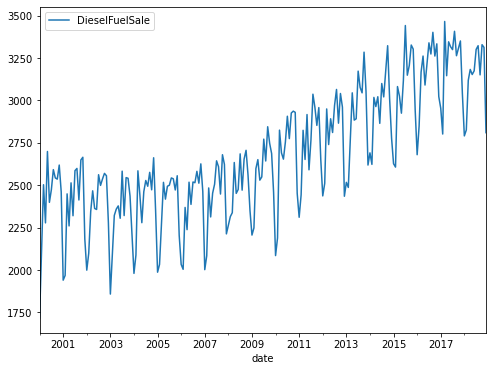

In [8]:
df_diesel.plot(figsize=(8,6))

## Sektorenverteilung bei Diesel

In [9]:
df_dieselSektoren2012_2016 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/SektoralerVerbrauchDiesel_2012_2016.csv', delimiter=' ', index_col='Sektor')
df_dieselSektoren2006_2012 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/SektoralerVerbrauchDiesel_2006_2012.csv', delimiter=' ', index_col='Sektor')
df_dieselSektoren2000_2006 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/SektoralerVerbrauchDiesel_2000_2006.csv', delimiter=' ', index_col='Sektor')

df_dieselSektoren2006_2012 = df_dieselSektoren2006_2012.drop('2012', axis=1)
df_dieselSektoren2000_2006 = df_dieselSektoren2000_2006.drop('2006', axis=1)

var = ['Strassenverkehr', 'Gesamt']
#df_dieselSektoren2012_2016 = df_dieselSektoren2012_2016[df_dieselSektoren2012_2016.index == 'Strassenverkehr']
#df_dieselSektoren2006_2012 = df_dieselSektoren2006_2012[df_dieselSektoren2006_2012.index == 'Strassenverkehr']
#df_dieselSektoren2000_2006 = df_dieselSektoren2000_2006[df_dieselSektoren2000_2006.index == 'Strassenverkehr']

df_dieselSektoren2006_2012.head()

df_SektorenDiesel = pd.concat([df_dieselSektoren2000_2006, df_dieselSektoren2006_2012, df_dieselSektoren2012_2016], axis=1)
df_SektorenDiesel = df_SektorenDiesel.dropna(axis=0)

#df_SektorenDiesel['RatioStrasseToGesamt'] = df_SektorenDiesel[df_SektorenDiesel.index == 'Strassenverkehr'] / df_SektorenDiesel[df_SektorenDiesel.index == 'Gesamt']
df_SektorenDiesel['2012']['Strassenverkehr']

RatioStrasseToGesamt = []
for column in df_SektorenDiesel:
    RatioStrasseToGesamt = np.append(RatioStrasseToGesamt,(df_SektorenDiesel[column]['Strassenverkehr'] / df_SektorenDiesel[column]['Gesamt']))

years = np.array(df_SektorenDiesel.columns)
df_SektorenDiesel = pd.DataFrame({'RatioStrasseToGesamt': RatioStrasseToGesamt}, index=years)

#df_SektorenDiesel.head()
df_SektorenDiesel.head()

,RatioStrasseToGesamt
2000,0.891847
2001,0.894903
2002,0.899026
2003,0.898297
2004,0.903077


## only take x percent of diesel sales that correspond to street traffic 

In [10]:
#create array with 12 values per year
monthlyRatioStrass = []
for year in df_SektorenDiesel.index:
    for k in range(0,12):
        monthlyRatioStrass.append(df_SektorenDiesel.RatioStrasseToGesamt[year])
        
# no data for 2017 and 2018 -> take ratio of 2016
for k in range(0,24):
        monthlyRatioStrass.append(df_SektorenDiesel.RatioStrasseToGesamt['2016'])


In [11]:
old = df_diesel.DieselFuelSale
df_diesel.DieselFuelSale = df_diesel.DieselFuelSale * monthlyRatioStrass

# Benzin

In [12]:
df_benzin2012_2018 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/OttoKraftstoff_monatlAbsatzInTsdTonnen_2012_2018.csv', delimiter=' ', index_col='Monat')
df_benzin2006_2012 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/OttoKraftstoff_monatlAbsatzInTsdTonnen_2006_2012.csv', delimiter=' ', index_col='Monat', encoding='latin-1')
df_benzin2000_2006 = pd.read_csv('../data/mobility/raw_data/MWV_FuelSale/OttoKraftstoff_monatlAbsatzInTsdTonnen_2000_2006.csv', delimiter=' ', index_col='Monat', encoding='latin-1')

#preprocess dataframes
df_benzin2006_2012 = df_benzin2006_2012.drop('2012', axis=1)
df_benzin2000_2006 = df_benzin2000_2006.drop('2006', axis=1)

#data from 2012 until 2018 has a . as a separator which is like a comma in english -> multiply by 1000
for column in df_benzin2012_2018:
    df_benzin2012_2018[column] = df_benzin2012_2018[column].values * 1000
    
df_benzin = pd.concat([df_benzin2000_2006, df_benzin2006_2012, df_benzin2012_2018],axis=1)

In [13]:
val = []
for column in df_benzin:
    if column != 'Monat':
        val = np.append(val, np.array(df_benzin[column].values))

In [14]:
df_benzin = pd.DataFrame({'BenzinFuelSale': val}, index=ind)
df_benzin.index.name = 'date'

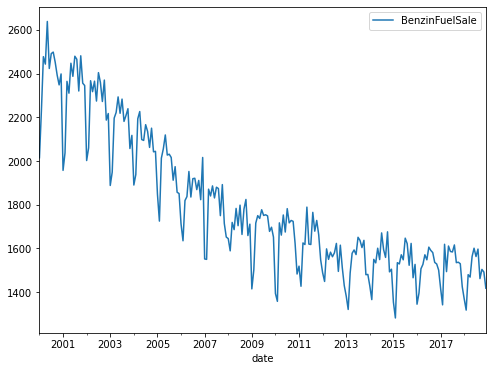

In [15]:
df_benzin.plot(figsize=(8,6))

# CO2 calculation

CO2 pro Liter Kraftstoff: \
https://www.deutsche-handwerks-zeitung.de/kraftstoffverbrauch-in-co2-ausstoss-umrechnen/150/3097/57956#:~:text=Ein%20Liter%20Benzin%20entspricht%202.320,Gramm%20CO2%20angesetzt%20werden. \

Umrechnung tonnen Kraftstoff in Liter: \
1 Liter Benzin: 2.320 Gramm CO2 \
1 Liter Diesel: 2.650 Gramm CO2 



Tonnen Kraftstoff in Liter \
1 t Benzin:	1.333,33 l	\
1 t Diesel:	1.190,47 l	



In [21]:
df1 = df_benzin
df2 = df_diesel

In [22]:
df = pd.concat([df1, df2],axis=1)

,BenzinFuelSale,M_KFZ,M_SV,M_PKW,DieselFuelSale
date,,,,,
2003-01,1888.0,9.392795e+05,147258.069892,792021.460314,1669.035070
2003-02,1949.0,9.304566e+05,145590.651613,784865.938413,1877.439880
2003-03,2196.0,1.048648e+06,162096.791398,886550.899941,2085.844689
2003-04,2222.0,1.053978e+06,163423.132258,890554.837579,2119.081663
2003-05,2293.0,1.069978e+06,163692.503226,906285.542829,2136.149299


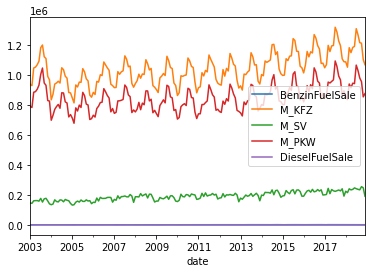

In [23]:
df.plot()
df.head()

## Berechnung CO2 Werte

In [24]:
TsdTonnes = 1000 #fuel sale is in 1000 tonnes
TonneInLiterBenzin = 1333.33
TonneInLiterDiesel = 1190.47
LiterInCO2Benzin = 2.320
LiterInCO2Diesel = 2.650

df['BenzinFuelSale_CO2'] = df.BenzinFuelSale.values * TsdTonnes * TonneInLiterBenzin * LiterInCO2Benzin # CO2 in kg
df['DieselFuelSale_CO2'] = df.DieselFuelSale.values * TsdTonnes * TonneInLiterDiesel * LiterInCO2Diesel # CO2 in kg

In [25]:
df['Kraftstoff_CO2'] = (df['BenzinFuelSale_CO2'] + df['DieselFuelSale_CO2']) / 1000 #in tons

## Save data

In [57]:
df_save = df[['BenzinFuelSale', 'BenzinFuelSale_CO2', 'DieselFuelSale', 'DieselFuelSale_CO2']]

df_save = df_save.rename(columns={'BenzinFuelSale': 'BenzinFuelSale_InTsdTonnes', 
                                  'BenzinFuelSale_CO2': 'BenzinFuelSale_CO2inTonnes', 
                                  'DieselFuelSale': 'DieselFuelSale_InTsdTonnes', 
                                  'DieselFuelSale_CO2': 'DieselFuelSale_CO2inTonnes'})
df_save.index.name = 'date'
df_save.to_csv('../data/mobility/M_MWVFuelSale.csv')